In [1]:
%pylab inline
import random
from IPython.display import Math

Populating the interactive namespace from numpy and matplotlib


# Aufgabenblatt 3

##1. Erzeugung von Zufallszahlen

Generieren Sie Zufallszahlen aus einer Dreiecksverteilung:

Erzeugen sie mit den Verfahren Zufallszalen mit Erwartungswert $\mu = 1$ und Varianz $\sigma^2 = 1$

**a.)** durch Addition zweier Zufallszahlen aus einer Gleichverteilung, $\xi_i \mapsto \mathcal{U}[0,1]$

<IPython.core.display.Math object>

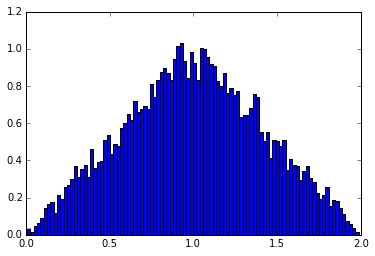

In [2]:
N = 10000
#Addiere 'N' mal zwei auf [0,1) gleich verteilte Zufallszahlen
summeAusZweiGleichverteilungen = np.random.uniform(0,1,(N,)) + np.random.uniform(0,1,(N,))

_ = pylab.hist(summeAusZweiGleichverteilungen, bins=100, normed=1)
display(Math('\mu = %.5f, \sigma^2 = %.5f' % (summeAusZweiGleichverteilungen.mean(), summeAusZweiGleichverteilungen.var())))

Um $\mu=1$ und $\sigma^2 = 1$ zu erreichen wählen wir andere Grenzen für die Gleichverteilungen

Laut [Wikipedia](https://de.wikipedia.org/wiki/Dreiecksverteilung#Beziehung_zu_anderen_Verteilungen) gilt:

> Die Summe zweier identischer unabhängiger und stetig gleichverteilter Zufallsvariablen ist dreiecksverteilt mit $b-c=c-a$, Standardabweichung ${\sqrt{6}(b-a)} / {12}$

Um $\sigma^2 = 1$ zu erhalten wählen wir also als grenzen für die Dreiecksverteilung $a=-\sqrt{6}, b=\sqrt{6}$ um $\sqrt{6} \cdot 2 \cdot \sqrt{6} / 12 = 1$ zu erhalten.

Da $b$ und $a$ den Grenzen der Dreiecksverteilung entsprechen, müssen sie halbiert werden um die Grenzen $a'$ und $b'$ für die Gleichverteilung zu erhalten.

<IPython.core.display.Math object>

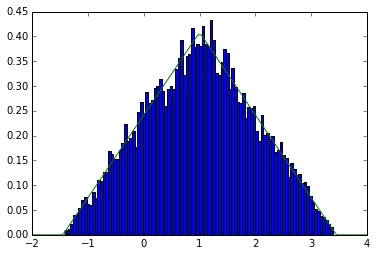

In [3]:
#Parameter für Gleichverteilungen
a = -sqrt(6)/2
b =  sqrt(6)/2

def dreiecksDichte(a, b, c, x):
    if a <= x < c:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif c < x <= b:
        return 2 * (b - x) / ((b - a) * (b - c))
    elif c == x:
        return 2 / (b - a)
    else:
        return 0.0

dreieckvec = np.vectorize(lambda x: dreiecksDichte(1 - sqrt(6), 1 + sqrt(6), 1, x))
x = np.linspace(-2, 4, 100)
y = dreieckvec(x)

summeAusZweiGleichverteilungen = 1 + np.random.uniform(a,b,(N,)) + np.random.uniform(a,b,(N,))
_ = pylab.hist(summeAusZweiGleichverteilungen, bins=100, normed=1)
pylab.plot(x,y, '-')
display(Math('\mu = %.5f, \sigma^2 = %.5f' % (summeAusZweiGleichverteilungen.mean(), summeAusZweiGleichverteilungen.var())))

**b.)** durchdie Acceptance Rejection Methode. Schränken sie dabei das Dreieck durch die konstante Funktion im Definitionsgebiet ein.

`3-Zufallszahlen.pdf`: Acceptance-Rejection Methode (cont'd)
> Algorithmus zur Erzeugung von Zufallszahlen aus $f(x)$
> 1. Generiere $\xi_1$ aus $g(x)$
> 2. Generiere $\xi_2$ aus $U(0,1)$
> 3. Wenn $\frac {f(\xi_1)} {c g(\xi_1)} \ge \xi_2$, akzeptiere $\xi_1$  
>    sonst gehe zu Schritt 1

In [4]:
acceptanceRejection=np.empty(N)

c = 1/sqrt(6)
for i in range(N):
    #Versuche 100 mal eine Zahl zu ziehen
    for _ in range(100):
        #Generiere xi_1 aus g(x)
        xi_1 = random.uniform(-sqrt(6) + 1, sqrt(6) + 1)
        #Generiere xi_2 aus U(0,1)
        xi_2 = random.uniform(0,1)
        #Wenn f(xi_1) / (c * g(xi_1)) >= xi_2 akzeptiere xi_1
        if (dreiecksDichte(-sqrt(6) + 1, sqrt(6) + 1, 1, xi_1)/c >= xi_2): #Da xi_1 nur aus dem Definitoonsgebiet gezogen wird ist g(x)=1 für alle xi_1
            acceptanceRejection[i] = xi_1
            break
    else:
        raise "Zuuu viele versuche..."

<IPython.core.display.Math object>

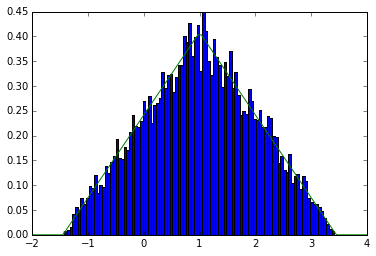

In [5]:
_ = pylab.hist(acceptanceRejection, bins=100, normed=1)
pylab.plot(x,y, '-')
display(Math('\mu = %.5f, \sigma^2 = %.5f' % (acceptanceRejection.mean(), acceptanceRejection.var())))

del acceptanceRejection
del summeAusZweiGleichverteilungen

#EXTRA:  Durch Drehung

Anstatt wie bei Acceptance/Rejectance $\xi_1$ zu verwerfen, wenn der Punkt $(\xi_1, \xi_2)$ nicht unterhalb der Dichte liegt wird $\xi_1$ an $a + \frac {c - a} 2$, bzw $c + \frac {b - c} 2$ gespiegelt. (Abhängig davon ob $\xi_1 \le c$ oder $\xi_1 > c$)

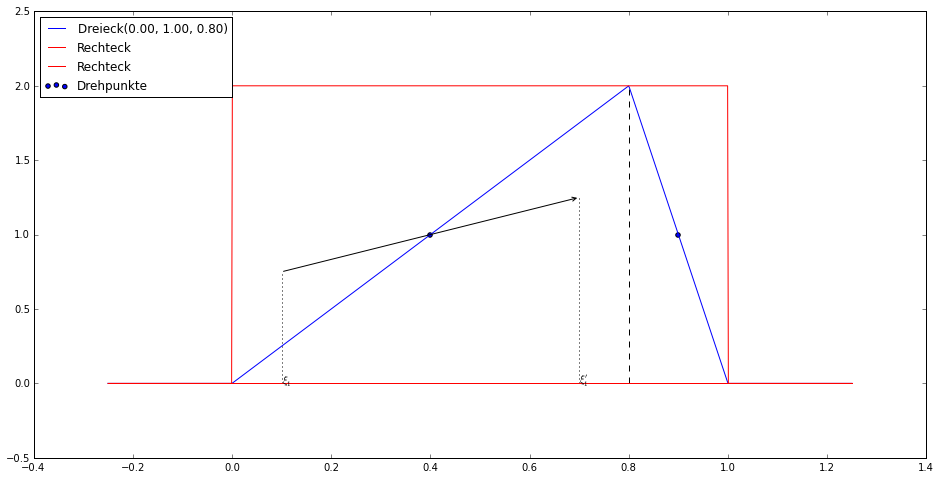

In [6]:
#Erzeuge Zeichnung um das ganze ein wenig zu erklären...
pylab.figure(figsize=(16,8))

a = 0
b = 1
c = 0.8
m = 2 / (b - a)
dichte = lambda x: dreiecksDichte(a, b, c, x)
dreieckvec = np.vectorize(dichte)
x = np.linspace(a-0.25, b + 0.25, 1000)
y = dreieckvec(x)
rechteck = lambda x: m if a <= x <= b else 0
pylab.plot(x,y, label="Dreieck(%.2f, %.2f, %.2f)" % (a,b,c))
pylab.plot(x, np.vectorize(rechteck)(x), 'r', label="Rechteck")
pylab.plot(x, np.zeros(len(x)), 'r', label="Rechteck")

drehPunkte = [a + (c - a) / 2, c + (b - c) / 2]
pylab.scatter(drehPunkte,dreieckvec(drehPunkte), label = "Drehpunkte")
pylab.vlines(c, 0, m, linestyles='dashed')

for x, y in [(0.1, 0.75)]:
    drehPunkt = (a + (c - a) / 2, dreieckvec(a + (c - a) / 2))
    newx = x + 2 * (drehPunkt[0] - x)
    newy = y + 2* (drehPunkt[1] - y )
    pylab.annotate("", xy=(newx, newy), xytext=(x, y), arrowprops=dict(arrowstyle="->"))
    pylab.vlines(newx, 0, newy, linestyles='dotted')
    pylab.vlines(x, 0, y, linestyles='dotted')
    pylab.annotate(r"$\xi_1$", xy=(x, 0))
    pylab.annotate(r"$\xi_1'$", xy=(newx, 0))
_ = pylab.legend(loc='upper left')

In [7]:
#Dreiecksverteilungs-Parameter
a = -sqrt(6) + 1
b =  sqrt(6) + 1
c = 1

N = 100000



def dreheUm(p, x):
    """Spiegele Punkt p am Punkt x, sodass gilt p - x = - (p' - x). 
    Also der Abstand von p' zu x bleibt gleich, liegt jedoch auf der anderen Seite."""
    return x - (p - x)
def versucheParameter(a,b,c):
    m = 2 / (b - a)
    dreieckvec = np.vectorize(lambda x: dreiecksDichte(a,b,c,x))
    x = np.linspace(a - 0.25, b + 0.25, 100)
    y = dreieckvec(x)

    dreieckDrehung = np.empty(N)
    for i in range(N):
        xi_1 = random.uniform(a, b)
        xi_2 = random.uniform(0, m)
        if dreiecksDichte(a, b, c, xi_1) >= xi_2:
            #(xi_1, xi_2) liegt unterhalb der dreiecksverteilung: wird akzeptiert
            dreieckDrehung[i] =  xi_1
        else:
            #Anstatt wie bei acceptance rejectance abzulehnen drehen wir den punkt so, das er unterhalb liegt.
            if xi_1 <= c:
                dreieckDrehung[i] = dreheUm(xi_1, a + (c - a) /2)
            elif xi_1 > c:
                dreieckDrehung[i] = dreheUm(xi_1, c + (b - c) / 2)
    pylab.hist(dreieckDrehung, bins=100, normed=1)
    pylab.plot(x,y, '-')
    display(Math('\mu = %.5f, \sigma^2 = %.5f' % (dreieckDrehung.mean(), dreieckDrehung.var())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

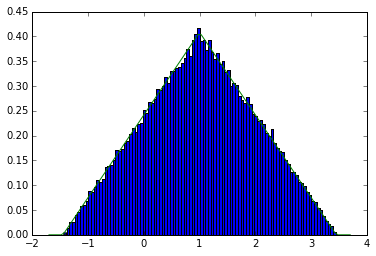

<IPython.core.display.Math object>

<IPython.core.display.Math object>

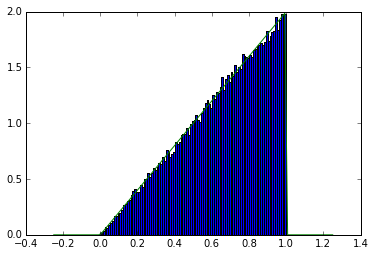

<IPython.core.display.Math object>

<IPython.core.display.Math object>

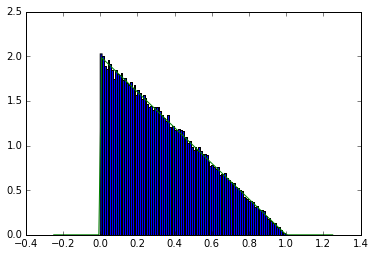

<IPython.core.display.Math object>

<IPython.core.display.Math object>

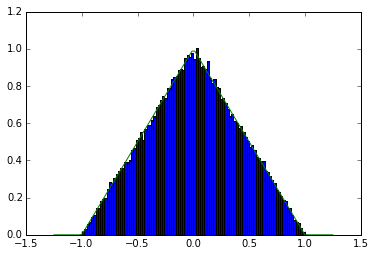

In [8]:
display(Math('\\text{Dreiecksverteilung mit } a = 1 - \sqrt{6}, b = 1 + \sqrt{6}, c = 1'))
versucheParameter(1 - sqrt(6), 1 + sqrt(6), 1);
pylab.show()
for a,b,c in [(0, 1, 1), (0,1,0), (-1, 1, 0)]:
    display(Math('\\text{Dreiecksverteilung mit } a = %d, b = %d, c = %d' % (a,b,c)))
    versucheParameter(a, b, c);
    pylab.show()

Es konnten Zufallszahlen nach der gewünschten Dreiecksverteilung erzeugt werden, ohne das Zufallszahlen verworfen werden mussten.

##2. Integration mit der Mittelwert-Methode

Bestimmen sie folgende Integrale mit der Mittelwert-Methode

**a.)** $$\int_0^1 \frac{\ln x} {x + 1}dx = \frac {\pi^2} {12}$$

In [9]:
N = 5000
def f(x):
    return log(x)/(x+1)

fv = np.vectorize(f)
#Werte f an N zufälligen Stellen auf [0,1) aus. Summiere die Funktionswerte und teile durch N
result = sum(fv(np.random.uniform(size=N)))/N
print ("Ergebnis:  {:+}".format(result))
print ("Erwartet:  {:+}".format(-(math.pi**2)/12))
print ("Differenz: {:+}".format(result+(math.pi**2)/12))

Ergebnis:  -0.8007331103063512
Erwartet:  -0.8224670334241132
Differenz: +0.02173392311776201


**b.)** Als Beipsiel für eine mehrdimensionale Integration betrachten Sie die sogenannte Apéry-Konstante $\zeta(3)$, die durch folgendes Integral dargestellt werden kann

$$ \int_0^1\int_0^1\int_0^1 dx dy dz \frac {P_n(x)P_n(y)} {1-(1-xy)z} = \begin{cases} 
      2\zeta(3) & n=0 \\
      2(\zeta(3)-1) & n=1 \\
      5\zeta(3)-6 & n = 2 \\
      12\zeta(3)-\frac {2201} {108} & n=3\\
   \end{cases}
$$

wobei die $P_n(x)$ die Legendre Polynome sind

$$
\begin{align}
P_0(x) &=1 \\
P_1(x) &= x\\
P_2(x) &= \frac 1 2 (3x^2 - 1) \\
P_3(x) &= \frac 1 2 (5x^3 - 3x)
\end{align}
$$
Der Näherungswert für die Apérty-Konstante ist gegeben durch $$\zeta(3) = 1.2020569031595942853997381615$$

In [10]:
def P(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n == 2:
        return (3*x**2-1)/2
    elif n ==3:
        return (5*x**3-3*x)/2
def f(n,x,y,z):
    return P(n,x)*P(n,y)/(1-(1-x*y)*z)

#Stelle nach Zeta(3) um
def getZeta(n,v):
    if n ==0:
        return v/2
    elif n == 1:
        return v/2 + 1
    elif n == 2:
        return (v + 6)/5
    elif n == 3:
        return (v + 2201./108)/17
N = 10000
fv = np.vectorize(f)
for n in range(4):
    v = sum(fv(n, np.random.uniform(size=N),np.random.uniform(size=N),np.random.uniform(size=N)))/N
    z = getZeta(n,v)
    display(Math('n = %d, \zeta(3) \\approx %.20f  %+.20f' % (n, z, z - 1.2020569031595942853997381615))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##3. Vergleich zwischen Hit-and-Miss und Mittelwert-Methode

Bestimmen Sie folgendes Integral
$$I=\int_0^{\infty} e^{-(x^2-2)^2/2} dx\approx 0.9977$$

**a.)** Stellen sie zunächst den Integranden graphisch dar  

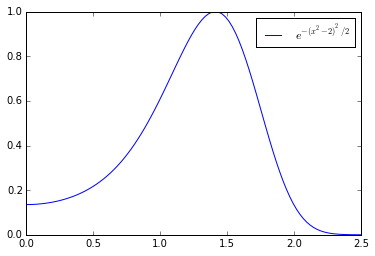

In [11]:
def f(x):
    return exp((-(x**2 - 2)**2)/2)
fv = np.vectorize(f)
x = np.linspace(0, 2.5, 100)
y = fv(x)
pylab.plot(x,y,label='$e^{-(x^2-2)^2/2}$')
_ = pylab.legend()

Approximieren Sie das Integral im Intervall $x \in [0,2.5]$ und bestimmen Sie jeweils den Erwartungswert und die Varianz  
**b.)** mit der Hit-and-Miss Methode  

In [12]:
N = 5000
a = 0
b = 2.5
x = np.random.uniform(low=a, high=b,size=N)
y = np.random.uniform(low=0, high=1,size=N)
n_hit = numpy.count_nonzero(y < fv(x))
result = n_hit*(2.5*1)/N
display(Math('\langle I \\rangle_{N} = %f' % result))
deltaI = result/sqrt(N) * sqrt(2.5/result - 1)
display(Math('\delta I = \\frac I {\sqrt{N}} \sqrt{\\frac A I - 1}) = %f' % deltaI))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**c.)** mit der Mittelwert Methode

In [13]:
N = 5000
a = 0
b = 2.5
fxis = fv(np.random.uniform(low=a, high=b,size=N))
result = (b-a)*sum(fxis)/N
display(Math('\langle I \\rangle_{N} = %f' % result))

<IPython.core.display.Math object>

$$\begin{align}
\Delta_{\sigma_m} &= \left(\frac {\langle I \rangle_N - \mathbb{E}[I]} {\sigma/\sqrt{N}}\right) \\
\sigma &= \sqrt{\frac 1 N \sum^N_{i=1}(f(\xi_i) - \mathbb{E}[I])^2}
\end{align}
$$

Nehme an: $\mathbb{E}[I] = 0.9977$

In [14]:
sigma = sqrt( sum((fxis - 0.9977)**2) / N  )
display(Math('\sigma = %f' % sigma))
deltasigmam = (result - 0.9977) / (sigma * sqrt(N))
display(Math('\Delta_{\sigma_{m}} = %f' % deltasigmam))

del fxis

<IPython.core.display.Math object>

<IPython.core.display.Math object>